# Master Bioinformatik SS 24
Projektabgabe Teil 1 - Mnist SDK und CNN

Maximilian Reutterer - (c2310542015)

Jakob Weinzierl

**Abschnitt 1: Workspace Setup und Data-Set Up**

Die ersten Abschnitte dienen der Bereitstellung der Daten (mnist) und dem Modulimport.
Aus der Gruppennnummer ergibt sich für uns die Zahl 3 als zu klassifizierende Zielvariable.

In [107]:
#maxi =015
#jakob = 013
#globalGroupNumber = 013015
globalGroupNumberInt = 13015
globalGroupDigit = 3


In [37]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

Wir erstellen uns unser Datenset. Dieses beinhaltet 10000 zufällige Datenpunkte. Die Zufällige Auswahl mithilfe des Seesdings des Random-Moduls anhandf unserer Gruppennummer.
X ist unsere Auswahl Vector, der als Elemente die 784 Einträge langen Arrays hat, welchje die 2-dimensionale Struktur der Daten in Matrixform (28x28) halten.
y hält die dazugehörge Zahlen integer-Form

In [63]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)

mnist
# Set the random seed
np.random.seed(globalGroupNumberInt)

# Get indices for random selection
indices = np.random.choice(mnist.data.shape[0], 10000, replace=False)
print(indices)
# Select subset using the indices
# mnist = mnist[indices]
X = mnist.data[indices]
y = mnist.target[indices]
mnist.keys()
X.shape
y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


[42396 56823 43414 ... 59936 40497 10543]


(10000,)

Wir definieren uns eine gekapselte Klasse zum einfachen auslesen der Vectoren an einem bestimmten index. In diesem Beispiel sieht man, dass unsere Daten-Vectoren an index 3 die zahl 3, an index 4 die Zahl 8 halten.

3
Saving figure some_digit_plot


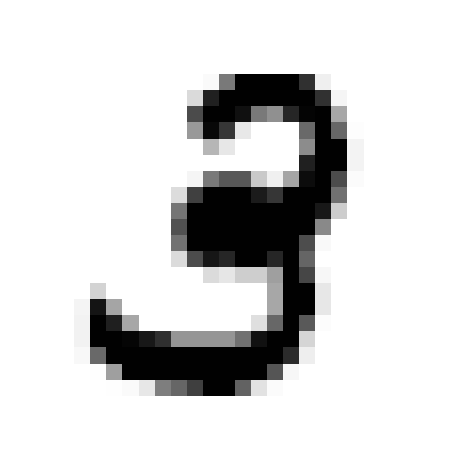

8
Saving figure some_digit_plot


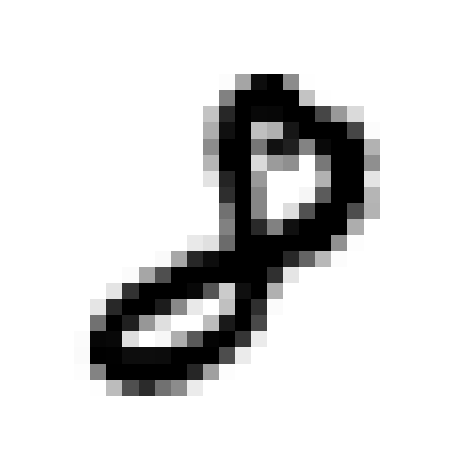

In [89]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

class ShowDigit():

  def __init__(self, X, y,index):
    some_digit = X[index]
    some_digit_image = some_digit.reshape(28, 28)
    #print(X[3])
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    print(y[index])
    save_fig("some_digit_plot")
    plt.show()


ShowDigit(X, y, 3)
ShowDigit(X, y, 4)

In [122]:
y = y.astype(np.uint8)

In [80]:
X_train, X_test, y_train, y_test = X[:8000], X[8000:], y[:8000], y[8000:]

In [124]:
print(y_train[10])

7


# Training a Binary Classifier

In [126]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [125]:
y_train_3[y_train_3 == True]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In deisem abschnitt wird das eigentliche Model instanziert und trainiert. Dem Zugrunde liegt ein der Stochastic Gradient Descent. Iterativ wird dabei die Ableitung(= Gradeint) der Kostenfunktion anhand der momentan errechenten Modellparameter errechent und dementgegen die Modellparameter so angepasst, dass die Kostenfunktion minimiert wird. "Stochatik" bedeutet heirbei, dass immer nur ein zufälliger Wert und nicht der gesamte Datensatz bei jeder Iteration für die Modellanpassung hinzugezogen wird.  

In [86]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

Nach Insannzeirung des SGDClassifier-Objects kann man über die predict-Methode die Zuordnung von Punkten auslesen ( True = Datensatz gehört zu 3, False = Datensatz ist nicht 3)
Um dies zu veranschaulichen, werden im folgenden Code-Block die ersten 5 einträge unseres Datensets ausgelsen (ShowDigit) und entsprechend über unser Modell klassifiziert.

[False]
6
Saving figure some_digit_plot


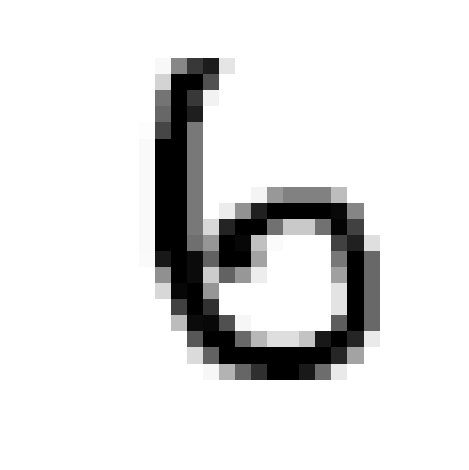

[ True]
3
Saving figure some_digit_plot


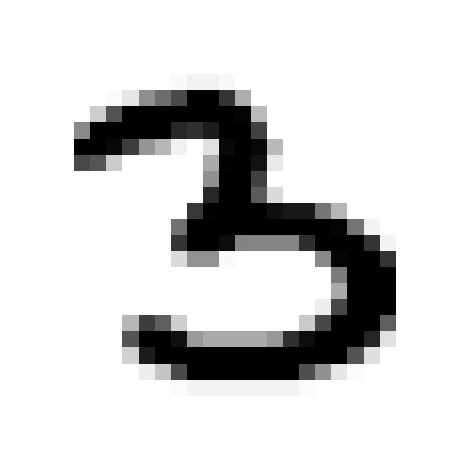

[False]
7
Saving figure some_digit_plot


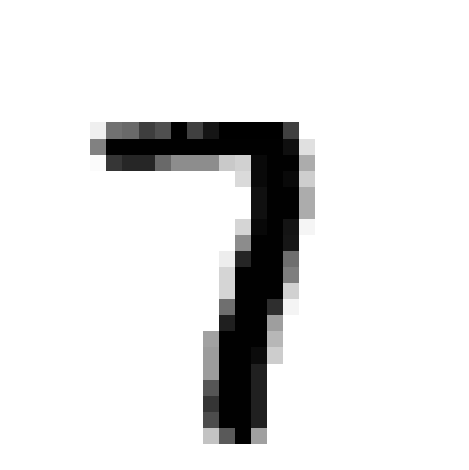

[ True]
3
Saving figure some_digit_plot


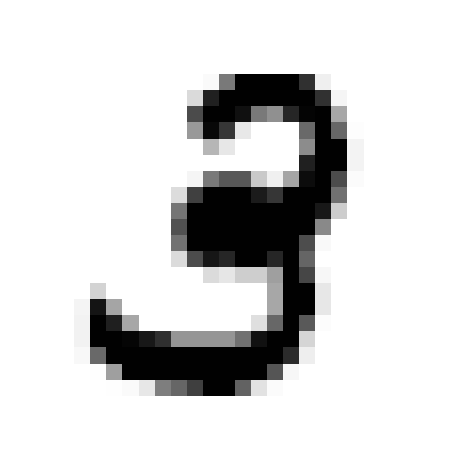

[False]
8
Saving figure some_digit_plot


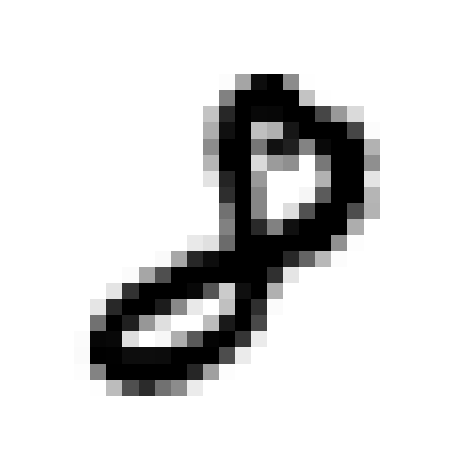

In [105]:

def prediction(index):
  digit = X[index]
  print(sgd_clf.predict([digit]))
  ShowDigit(X,y, index)


for k in range(0,5):
  prediction(k)


# Performance Measures

## Measuring Accuracy Using Cross-Validation

**Güte der Modellanpassung**
Im nächsten Schritt wird das Modell evaluert. Dazu wird eine Kreuvalideurng durchgeführt, bei der die Trainingsdaten in 3 Teile unterteilt werden, wobei das Modell mit jeweils 2 Teilen trainiert wird und die auf die Daten des 3. Teils getestet wird.


In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")
print("Scores: ", scores)
print("Mean: ", scores.mean())

[0.93175853 0.96250469 0.93435859]
0.9428739355817582


Dabei erhalten wir 0.942 als durchschnittlicher Wert für die Genauigkeit. Diese Metrik gibt wieder, welcher Protenzsazt der Daten korrekt klassifiziert wurde/wird. Mit Durchschnittlich 94.2% kann man von einer guten Modellanpassung sprechen.

**Stratifizierte Kreuzvalidirung**
Im Nächsten Schritt wird eine Strattifizierte Kreuzvalidierung durchgeführt. Der Unterschied zur normalen Kreuzvalidieurng ist, dass die Verteilung der Daten innerhalb er Teilmengen annähernd gleich ist. Es werden wieder 3 Splits erstellt, und die Anzahl manuell durch Division der Korrekt Klassifizeirten/gesamtAnazhl ermittelt.

In [120]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoresSKF =  []
for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_3[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_3[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    scoresSKF.append(n_correct / len(y_pred))
    print(n_correct / len(y_pred))

0.9587551556055494
0.9531308586426697
0.9598649662415604


**Note**: `shuffle=True` was omitted by mistake in previous releases of the book.

In [121]:
print(scoresSKF)
array = np.array(scoresSKF)
print(array.mean())

[0.9587551556055494, 0.9531308586426697, 0.9598649662415604]
0.9572503268299265


Als Referenz für unsere Modellanpassung initilasieren wir den Never5Classifier. Dieser "Klassifizier" demonstiert die Tatsache, dass selbst sehr schelchte Modelle gute Genauigkeitswerte erzeilen, wenn der Datensatz entsprechend passend ist.

Wenn ein traineirtes Modell also eine schlechtere Genauigkeit als der Never4Classifier liefert, heißt das in der Regel, dass das Modell re-evaluiert werden sollte. Analog zu unserem Modell wird mit unserem nver_5_clf eine Kreuzvalidierung durchgeführt.

In [128]:
from sklearn.base import BaseEstimator
class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [133]:
never_3_clf = Never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8927634 , 0.89951256, 0.89497374])

Hier wird ersichtlich, dass aufgrund der Beschaffenheut des Datensets ( ca 11% Klasse 3) hierbei eine 89% genauigkeit erreicht wird, da die Daten korrekt als "nicht 3" klassifiziert werden.

## Confusion Matrix

In [138]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
print(y_train_pred)

[False  True False ... False  True False]


In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_3, y_train_pred)

array([[6871,  295],
       [ 162,  672]])

In [137]:
y_train_perfect_predictions = y_train_3  # pretend we reached perfection
confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[7166,    0],
       [   0,  834]])

## Precision and Recall

In [101]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.0913937547600914

In [102]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.0913937547600914

In [103]:
recall_score(y_train_5, y_train_pred)

0.1610738255033557

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [139]:
from sklearn.metrics import f1_score

f1_score(y_train_3, y_train_pred)

0.7462520821765687

In [140]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.11661807580174927

## The ROC Curve

In [141]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([14541.8343997])

In [143]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [144]:
y_some_digit_pred

array([ True])

In [145]:
threshold = -300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [147]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3,
                             method="decision_function")

In [148]:
y_scores

array([-232483.12172917,  156693.42821596, -196699.68042102, ...,
       -328679.45400246,  225367.1549875 , -244653.95601223])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [104]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

NameError: name 'y_scores' is not defined